# Bolometry

There are 2 bolometry systems at AUG: diode and foil. The latter is absolutely calibrated but has a lower temporal resolution. The diode system is faster but you need to remove each channel's offset, as it varies over campaigns. There are plenty of bolometer LOS. so check diaggeom. For more detailed descriptions check:

* [Foil](https://www.aug.ipp.mpg.de/foswiki/pub/Bolometry/WebHome/foil_bolometry_description_2014.pdf)
* [AXUV](https://www.aug.ipp.mpg.de/foswiki/pub/Bolometry/WebHome/AXUV_bolometry_description_2014.pdf)

## Poor man's deconvolution

In [12]:
from ipfnpytools.getsig import getsig
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
shotnr = 29864
tBegin = 1.5
tEnd = 3.5
Deltat = 10e-3
times = np.arange(tBegin, tEnd+Deltat, Deltat)matplotlib

Use the DVC chord: Diode vertical channels. Generate channel strings.

In [3]:
shotfile = 'XVR'
chans = []
for L in range(3):
    for A in range(16):
        chan_name = 'S0L%dA%0.2d'%(L,A)
        chans.append(chan_name)

In [4]:
#Declare Missing channels and remove them from 'chans'
missing_channels = ['S0L0A10', 'S0L0A12']
for missing in missing_channels:
    try:
        chans.remove(missing)
    except:
        t=True

In [7]:
rad_matrix = np.zeros((len(times), len(chans)))

In [10]:
for rad_index in range(len(chans)):
    xvr = getsig(shotnr, shotfile, chans[rad_index])
    no_ofst_data = xvr.data - np.average(xvr.data[xvr.time <= 0])
    xvrint = interp1d(xvr.time, no_ofst_data)
    rad_matrix[:,rad_index] = xvrint(times)
    print(rad_index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


IndexError: list index out of range

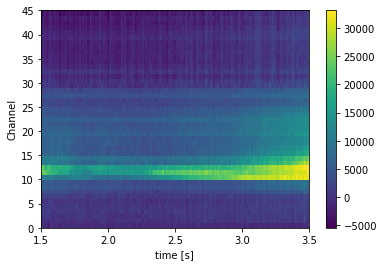

In [18]:
pclr = plt.pcolormesh(times, range(len(chans)), rad_matrix.T, shading='goraud')
plt.colorbar(pclr)
plt.xlabel('time [s]')
plt.ylabel('Channel')
plt.show()